In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pprint import pprint
from Crimson_Grants_Project_NSF_Dictionary import NSF_codes_dict

In [53]:
print(NSF_codes_dict)
df = pd.read_csv("NSF_data.csv")
df.head()

{'SBE': ('Social, Behavioral & Economic Sciences', {'SES': 'Division of Social and Economic Sciences', 'BCS': 'Division of Behavioral and Cognitive Sciences', 'NCSE': 'National Center for Science and Engineering Statistics', 'SMA': 'SBE Office of Multidisciplinary Activities'}), 'MPS': ('Mathematical and Physical Sciences', {'AST': 'Division of Astronomical Sciences', 'CHE': 'Division of Chemistry', 'DMR': 'Division of Materials Research', 'DMS': 'Division of Mathematical Sciences', 'PHY': 'Division of Physics'}), 'GEO': ('Geosciences', {'AGS': 'Division of Atmospheric and Geospace Sciences', 'EAR': 'Division of Earth Sciences', 'OCE': 'Division of Ocean Sciences', 'OPP': 'Office of Polar Programs'}), 'ENG': ('Engineering', {'CBET': 'Division of Chemical, Bioengineering, Environmental, and Transport Systems', 'CMMI': 'Division of Civil, Mechanical & Manufacturing Innovation', 'ECCS': 'Division of Electrical, Communications & Cyber Systems', 'EEC': 'Division of Engineering Education & C

,AwardNumber,Title,NSFOrganization,Program(s),StartDate,LastAmendmentDate,PrincipalInvestigator,State,Organization,AwardInstrument,...,OrganizationStreet,OrganizationCity,OrganizationState,OrganizationZip,OrganizationPhone,NSFDirectorate,ProgramElementCode(s),ProgramReferenceCode(s),ARRAAmount,Abstract
0,1227274,Doctoral Dissertation Research in Economics: T...,SES,Economics,8/15/12,8/14/12,David Cutler,MA,Harvard University,Standard Grant,...,1033 MASSACHUSETTS AVE,Cambridge,MA,21385369,6174955501,SBE,1320,"9178, 9179, SMET",$0.00,Large estimated market returns to education in...
1,1843727,EAGER: Building a Network of Quantum Diamond M...,PHY,"AMO Experiment/Atomic, Molecul, OFFICE OF MULT...",9/1/18,8/23/18,Roger Fu,MA,Harvard University,Standard Grant,...,1033 MASSACHUSETTS AVE,Cambridge,MA,21385369,6174955501,MPS,"1241, 1253, 1574, 7222","1031, 7916, 8990",$0.00,This EAGER Award is to explore the scientific ...
2,611616,University of NewMexico/Harvard PREM: Leaders...,DMR,"OFFICE OF MULTIDISCIPLINARY AC, MATERIALS RSCH...",7/1/06,6/22/11,Gabriel Lopez,NM,University of New Mexico,Continuing Grant,...,"1700 Lomas Blvd. NE, Suite 2200",Albuquerque,NM,871310001,5052774186,MPS,"1253, 1735, 7913","7608, 9150, 9161, 9162, 9177, 9178, 9179, AMPP...",$0.00,UNM/Harvard PREM: Leadership in Biomaterials<b...
3,1836744,Conference on Current Progress in Mathematical...,DMS,ANALYSIS PROGRAM,8/1/18,7/27/18,Arthur Jaffe,MA,Harvard University,Standard Grant,...,1033 MASSACHUSETTS AVE,Cambridge,MA,21385369,6174955501,MPS,1281,"057Z, 7556",$0.00,This award provides funding for participation ...
4,1028519,COLLABORATIVE RESEARCH: Nanobeam Lasers,ECCS,NANO EHS CORE,9/15/10,9/23/10,Marko Loncar,MA,Harvard University,Standard Grant,...,1033 MASSACHUSETTS AVE,Cambridge,MA,21385369,6174955501,ENG,7735,7735,$0.00,The objective of this research is the developm...


In [54]:
def preprocess_dict(df):
    df["AwardedAmountToDate"] = df["AwardedAmountToDate"].str.strip()
    df["AwardedAmountToDate"] = df["AwardedAmountToDate"].str.replace(',','')
    df["AwardedAmountToDate"] = df["AwardedAmountToDate"].str.replace('$','')
    df["AwardedAmountToDate"] = df["AwardedAmountToDate"].astype('float')
    # df["AwardedAmountToDate"] = df["AwardedAmountToDate"].astype('int')
    df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
    print(df.columns)
    return df

In [55]:
directorate_funding_dict = {}
df = preprocess_dict(df)

for directorate in NSF_codes_dict:
    directorate_projects_funding = df[df["NSFDirectorate"] == directorate]["AwardedAmountToDate"]
    print(f"{directorate}:")
#     if len(list(directorate_projects_funding)) > 0:
#         directorate_projects_funding = directorate_projects_funding.str.strip()
#         directorate_projects_funding = directorate_projects_funding.str.replace(',','')
#         directorate_projects_funding = directorate_projects_funding.str.replace('$','')
#         directorate_projects_funding = directorate_projects_funding.astype('float')
#         directorate_projects_funding = directorate_projects_funding.astype('int')
    print("Example Dollar Value:", (list(directorate_projects_funding)[0]))
    directorate_funding_dict[directorate] = list(directorate_projects_funding)
    print()

pprint(directorate_funding_dict)

Index(['AwardNumber', 'Title', 'NSFOrganization', 'Programs', 'StartDate',
       'LastAmendmentDate', 'PrincipalInvestigator', 'State', 'Organization',
       'AwardInstrument', 'ProgramManager', 'EndDate', 'AwardedAmountToDate',
       'Co-PINames', 'PIEmailAddress', 'OrganizationStreet',
       'OrganizationCity', 'OrganizationState', 'OrganizationZip',
       'OrganizationPhone', 'NSFDirectorate', 'ProgramElementCodes',
       'ProgramReferenceCodes', 'ARRAAmount', 'Abstract'],
      dtype='object')
SBE:
Example Dollar Value: 15000.0

MPS:
Example Dollar Value: 265566.0

GEO:
Example Dollar Value: 273985.0

ENG:
Example Dollar Value: 251262.0

BIO:
Example Dollar Value: 321323.0

EHR:
Example Dollar Value: 609066.0

{'BIO': [321323.0,
         323597.0,
         389921.0,
         102090.0,
         132280.0,
         250000.0,
         570985.0,
         136510.0,
         384915.0,
         160498.0,
         178198.0,
         289594.0,
         549610.0,
         89946.0,
     

         405000.0,
         109555.0,
         240222.0,
         11878.0,
         428392.0,
         390000.0,
         411151.0,
         300000.0,
         122583.0,
         397063.0,
         450000.0,
         0.0,
         305003.0,
         110558.0,
         270520.0,
         620000.0,
         691591.0,
         120493.0,
         600000.0,
         388666.0,
         1356266.0,
         450000.0,
         455000.0,
         100000.0,
         1274516.0,
         703437.0,
         97856.0,
         391201.0,
         399493.0,
         300000.0,
         510000.0,
         530000.0,
         257703.0,
         69454.0,
         516729.0,
         390000.0,
         716911.0,
         397557.0,
         448500.0,
         452913.0,
         148759.0,
         184843.0,
         41749.0,
         206433.0,
         450000.0,
         164000.0,
         435000.0,
         670000.0,
         281103.0,
         90000.0,
         128509.0,
         53444.0,
         49114.0,
   

In [56]:
def plot_funding_bar_std(funding_dict):
    directorates = funding_dict.keys()
    x_pos = np.arange(len(directorates))
    means = []
    stds = []
    for directorate in directorates:
        means.append(np.mean(funding_dict[directorate]))
#         print("MEAN", np.mean(funding_dict[directorate]))
        stds.append(np.std(funding_dict[directorate]))
        # print("STD", np.std(funding_dict[directorate]))
        
    fig, ax = plt.subplots()
    # ax.bar(x_pos, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
    ax.bar(x_pos, means, align='center', alpha=0.5, ecolor='black', capsize=10)
    ax.set_ylabel('Average Awarded Amount to Date (Millions of $)')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(directorates)
    scale_y = 1e6
    ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
    ax.yaxis.set_major_formatter(ticks_y)
    ax.set_title('Average Harvard Lab Funding by Directorate')
    ax.yaxis.grid(True)
    
    plt.tight_layout()
    plt.savefig('bar_plot_with_error_bars.png')
    plt.show()


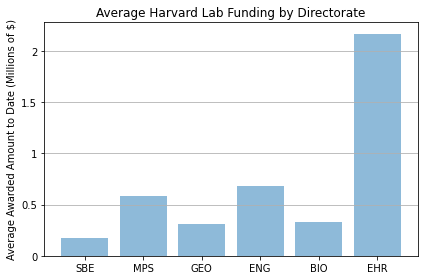

In [57]:
plot_funding_bar_std(directorate_funding_dict)

### Who's Getting the Dough?

In [81]:
def programs_with_max_funding(directorate_df, funding_dict):
    directorates = funding_dict.keys()
    max_funding_programs = {}
    for directorate in directorates:
        temp_df = df[df["NSFDirectorate"] == directorate]
        max_row = temp_df[temp_df["AwardedAmountToDate"] == temp_df["AwardedAmountToDate"]].max()
#         max_row = max_row.to_frame()
#         max_row = max_row.transpose()
        # print(type(max_row))
        # match_directorate = df["NSFDirectorate"] == directorate 
        # max_row = df[max_award & match_directorate]
        print(max_row)
        # print(max_row[3], max_row["AwardedAmountToDate"])
        max_funding_programs[directorate] = (max_row[3], max_row["AwardedAmountToDate"])
        # print(max_funding_programs[directorate])
    return max_funding_programs

In [82]:
max_funding_by_directorate = programs_with_max_funding(df, directorate_funding_dict)
pprint(max_funding_by_directorate)

AwardNumber                                                      9996374
Title                           fMRI and DOI Investigations of Deception
NSFOrganization                                                      SMA
Programs                                  Studies of Policy Sci Eng Tech
StartDate                                                        9/15/98
LastAmendmentDate                                                 9/9/09
State                                                                 WI
Organization           Virginia Polytechnic Institute and State Unive...
AwardInstrument                                           Standard Grant
ProgramManager                                              stephen zehr
EndDate                                                          9/30/98
AwardedAmountToDate                                          2.99829e+06
OrganizationCity                                              Washington
OrganizationState                                  